In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
m = 0.6 #initial start value of gradient
c = 0.2 #initial start value of y-intercept
L = 0.0001 #learning rate try playing around with the value to see which ones converge
epoch = 50 #define whatever number of epochs you want but mind both efficiency and accuracy issues
epoch_error_list = []
epoch_count_list = []

In [3]:
# Draw random samples from a normal (Gaussian) distribution.
noise = np.random.normal(1,15, 100) # mean and standard deviation

In [5]:
X = np.random.uniform(10, 100, 100)
y = m * X + c
Y = y + noise

N = float(len(X))

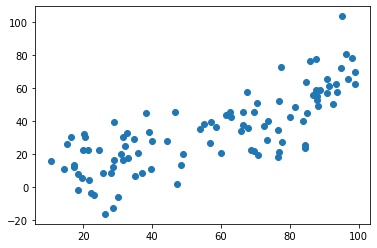

In [6]:
plt.scatter(X,Y)

In [7]:
def mse(N, Y, Y_hat): #the MSE function for error computation
    return (1/N)*sum(Y-Y_hat)**2

In [18]:
def gradient_descent_fit(m, c, N, L): #main function i.e. gradient descent to learn the line of best fit
    epoch_error_list = []
    epoch_count_list = []
    for i in range(epoch): #loop as many times as the epochs you want
        Y_hat = m * X + c
        
        #compute and arrest error for every iteration
        epoch_count_list = epoch_count_list[:] #trick the list to get its instace
        epoch_count_list.append(i)
        epoch_error = mse(N,Y, Y_hat)
        #print('error ',epoch_error)
        epoch_error_list=epoch_error_list[:]
        epoch_error_list.append(epoch_error)
        
        #minimize the error function by computing partial derivatives
        D_m = (-2/N) * sum(X*(Y-Y_hat))
        #print('D_m ',D_m)
        D_c=(-2/N)*sum(Y-Y_hat)
        
        #Apply gradient descent formular to update both m and c into new values
        m = m - (L * D_m)
        #print('new m is', m)
        c = c - (L * D_c)
        #you can print the final m and c after all iterations are done
        print("final m is: ",m," and final c is: ",c)
        #return final predicted value of Y-dependent variable
        return Y_hat,epoch_count_list,epoch_error_list

In [19]:
# Call gradient descent fit function
returned_params = gradient_descent_fit(m,c,N,L)
y_predicted = returned_params[0]
total_epochs = returned_params[1]
all_epoch_errors = returned_params[2]

final m is:  0.6072517369389746  and final c is:  0.199992658892946


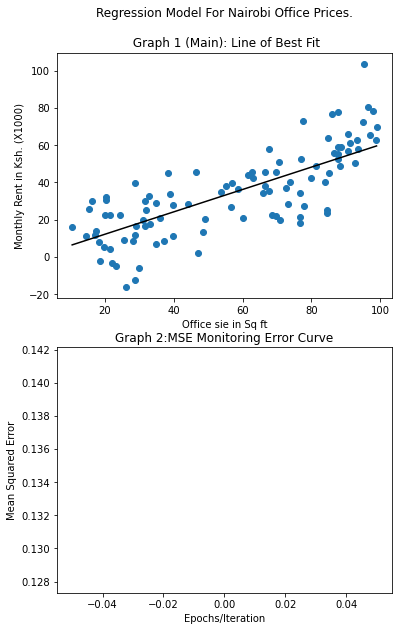

In [21]:
#create plot for both line of best fit and error reduction graphs
fig, (ax1, ax2) = plt.subplots(2, gridspec_kw={'top':2})
ax1.set(xlabel="Office sie in Sq ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(X,Y)

ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='black')
ax2.set_title("Graph 2:MSE Monitoring Error Curve")
ax2.set(xlabel="Epochs/Iteration")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)

#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()